<a href="https://colab.research.google.com/github/1070rahul/1070rahul/blob/main/Cat_and_dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# uploading dataset directly from Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 23.4MB/s]
100% 1.06G/1.06G [00:52<00:00, 22.0MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# Importing all the libraries for building a CNN model

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D, Flatten

In [6]:
# Using the concept of generators
# loading images from train dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

    )

Found 20000 files belonging to 2 classes.


In [7]:
# loading images from test dataset
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

    )

Found 5000 files belonging to 2 classes.


In [8]:
# Normalize beacsue these images are stored in the form of numpy
# The problem is each value of numpy is of 0-255 character and we need it from 0-1
def process (image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


# Building CNN model

In [9]:
# creating three convolution layers of 32, 64, and 128 filters or neurons
model = Sequential()

# for 32 filters
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu',input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size = (2,2), padding = 'valid', strides = 2))

# for 64 filters
model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu',input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size = (2,2), padding = 'valid', strides = 2))

# for 128 filters
model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu',input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size = (2,2), padding = 'valid', strides = 2))


model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

(None, 30, 30, 128)
1. Total params: 14847297
2. Trainable params: 14847297
3. Non-trainable params: 0

# Compile the model and execute it

In [11]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 62s 87ms/step - loss: 0.6746 - accuracy: 0.5924 - val_loss: 0.6077 - val_accuracy: 0.6926
Epoch 2/10
625/625 [==============================] - 53s 84ms/step - loss: 0.5214 - accuracy: 0.7393 - val_loss: 0.5123 - val_accuracy: 0.7496
Epoch 3/10
625/625 [==============================] - 58s 92ms/step - loss: 0.4119 - accuracy: 0.8094 - val_loss: 0.4700 - val_accuracy: 0.7880
Epoch 4/10
625/625 [==============================] - 54s 85ms/step - loss: 0.2804 - accuracy: 0.8787 - val_loss: 0.6493 - val_accuracy: 0.7524
Epoch 5/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1611 - accuracy: 0.9337 - val_loss: 0.8089 - val_accuracy: 0.7668
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0948 - accuracy: 0.9649 - val_loss: 1.1785 - val_accuracy: 0.7412
Epoch 7/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0747 - accuracy: 0.9736 - val_loss: 1.2076 - val_accuracy:

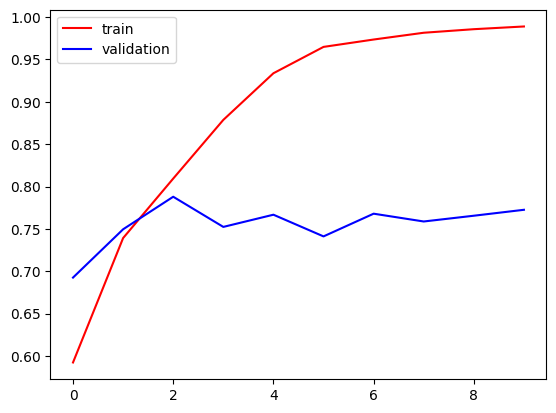

In [13]:
# Plotting the results
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

observation:
1. As epoch increases the training accuracy increases but the validation accuracy decreases2.
2. There is a gap in between them which shows there is overfitting

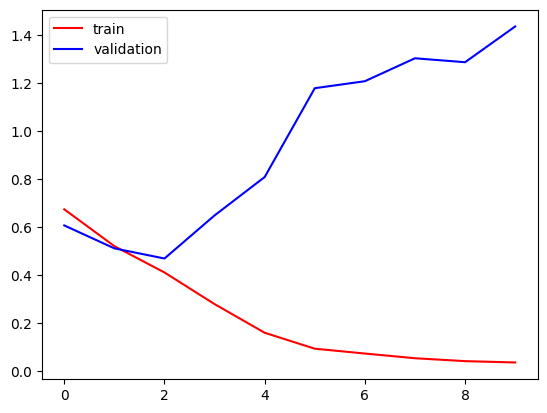

In [14]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

observation:
1. As epoch increases the training loss decreases but the validation loss increases decreases2.
2. There is a gap in between them which shows there is overfitting

# We will reduce the overfitting by using dropout and batch normalization method

In [15]:
from keras.layers import Dense, Conv2D,MaxPool2D, Flatten, BatchNormalization, Dropout

In [17]:
# creating three convolution layers of 32, 64, and 128 filters or neurons
model = Sequential()

# for 32 filters
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), padding = 'valid', strides = 2))

# for 64 filters
model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), padding = 'valid', strides = 2))

# for 128 filters
model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), padding = 'valid', strides = 2))


model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
# compile and execute
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Let's check if there's an improvement in the model

In [21]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 109ms/step - loss: 1.4184 - accuracy: 0.5849 - val_loss: 0.6792 - val_accuracy: 0.5698
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5998 - accuracy: 0.6696 - val_loss: 0.6394 - val_accuracy: 0.6766
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5250 - accuracy: 0.7247 - val_loss: 0.5303 - val_accuracy: 0.7304
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4620 - accuracy: 0.7617 - val_loss: 0.5208 - val_accuracy: 0.7180
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4111 - accuracy: 0.7890 - val_loss: 0.4787 - val_accuracy: 0.7758
Epoch 6/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3645 - accuracy: 0.8077 - val_loss: 0.4816 - val_accuracy: 0.7722
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3185 - accuracy: 0.8328 - val_loss: 0.4615 - val_ac

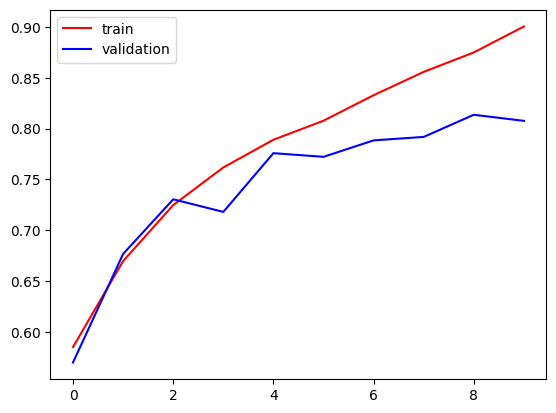

In [22]:
# Plotting the results
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

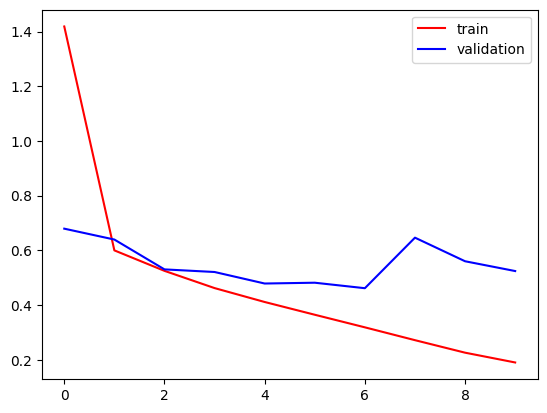

In [23]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()